# Popular Data Science Questions
Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

What kind of questions are welcome on this site?
On DSSE's help center's section on questions, we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

# Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for our goal:
- Posts
- PostTags
- Tags
- TagSynonyms

# Getting the Data


To get the relevant data we run the following query.

SELECT Id, CreationDate,<br>
       Score, ViewCount, Tags,<br>
       AnswerCount, FavoriteCount<br>
  FROM posts<br>
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

# Exploring the Data
We can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Only favoriteCount column has missing values. This could be due to post not being in user's favourite list. So we can replace the null values with zero.<br>
The types seem to be correct.<br>
Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [3]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

# Cleaning the Data

In [4]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [5]:
questions['Tags'] = questions['Tags'].str.replace('><', ',').str.replace('<', '').str.replace('>', '').str.split(',')
questions['Tags'].head(10)

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
5                                        [fuzzy-logic]
6    [time-series, anomaly-detection, online-learning]
7                               [matrix-factorisation]
8                [correlation, naive-bayes-classifier]
9    [machine-learning, python, deep-learning, kera...
Name: Tags, dtype: object

# Most Used and Most Viewed


In [6]:
questions['Tags'].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [7]:
tag_count = {}
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
print(tag_count)

{'hinge-loss': 7, 'dimensionality-reduction': 69, 'gridsearchcv': 28, 'dummy-variables': 19, 'rmsle': 1, 'matrix': 22, 'machine-translation': 28, 'text-generation': 17, 'supervised-learning': 82, 'information-theory': 9, 'wikipedia': 1, 'activity-recognition': 5, 'churn': 15, 'ranking': 22, 'sagemaker': 8, 'convolution': 103, 'beginner': 27, 'labels': 28, 'programming': 7, 'scipy': 40, 'ndcg': 5, 'parallel': 8, 'social-network-analysis': 11, 'octave': 4, 'mongodb': 2, 'vector-space-models': 7, 'markov': 4, 'multi-instance-learning': 2, 'svr': 5, 'automation': 4, 'association-rules': 19, 'weighted-data': 14, 'csv': 27, 'inception': 10, 'ensemble-learning': 11, 'software-recommendation': 4, 'markov-hidden-model': 13, 'metric': 60, 'theano': 4, 'glm': 3, 'representation': 9, 'anaconda': 20, 'pip': 4, 'word2vec': 88, 'data-transfer': 1, 'dynamic-programming': 3, 'alex-net': 5, 'scraping': 5, 'similar-documents': 20, 'pac-learning': 6, 'deep-network': 29, 'convergence': 17, 'tools': 8, 'twi

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
hinge-loss,7
dimensionality-reduction,69
gridsearchcv,28
dummy-variables,19
rmsle,1
matrix,22
machine-translation,28
text-generation,17
supervised-learning,82
information-theory,9


In [9]:
# Getting to top 20 counts
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


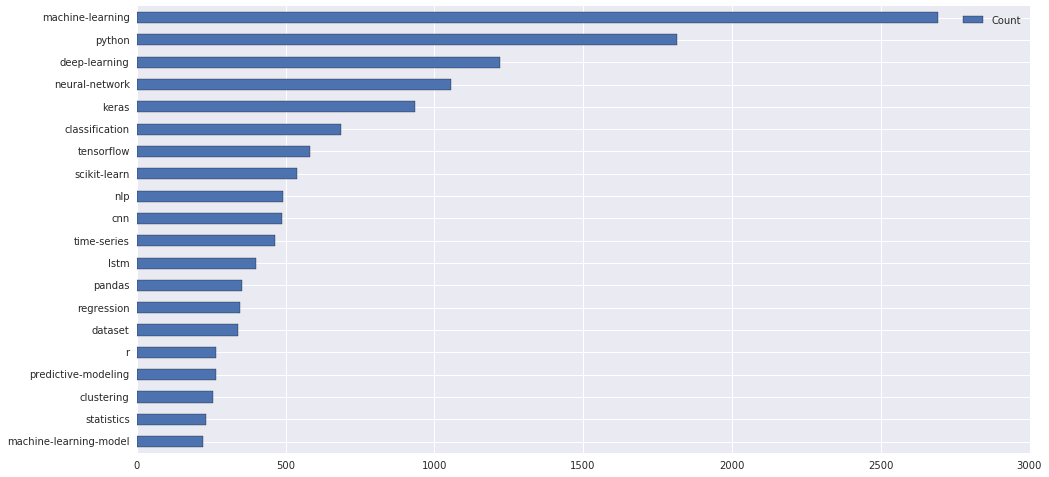

In [10]:
most_used.plot(kind='barh', figsize=(16,8))

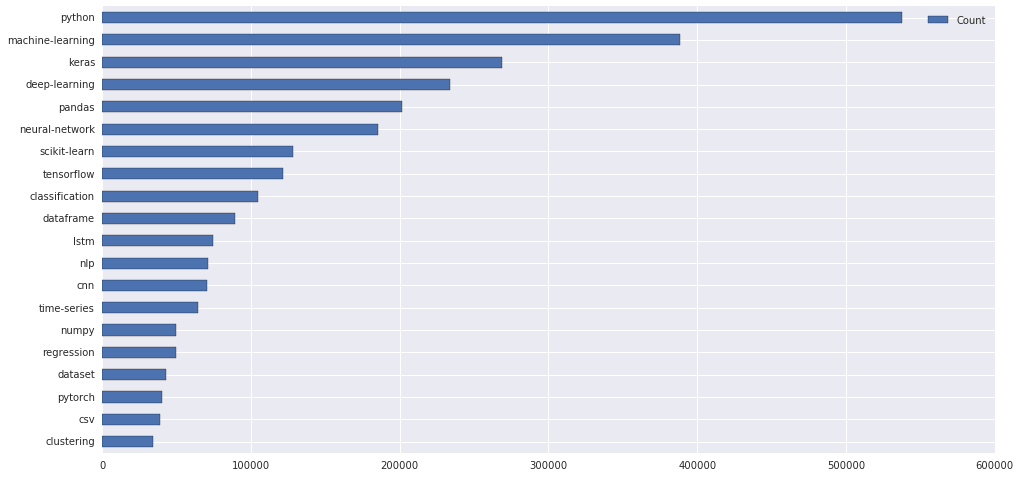

In [11]:
view_count = {}
def count(row):
    for tag in row['Tags']:
        if tag in view_count:
            view_count[tag] += row['ViewCount']
        else:
            view_count[tag] = row['ViewCount']
    
questions.apply(count, axis=1)

view_count = pd.DataFrame.from_dict(view_count, orient="index")
view_count.rename(columns={0: "Count"}, inplace=True)

# Getting to top 20 counts
most_viewed = view_count.sort_values(by="Count").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4296939518>],
      dtype=object)

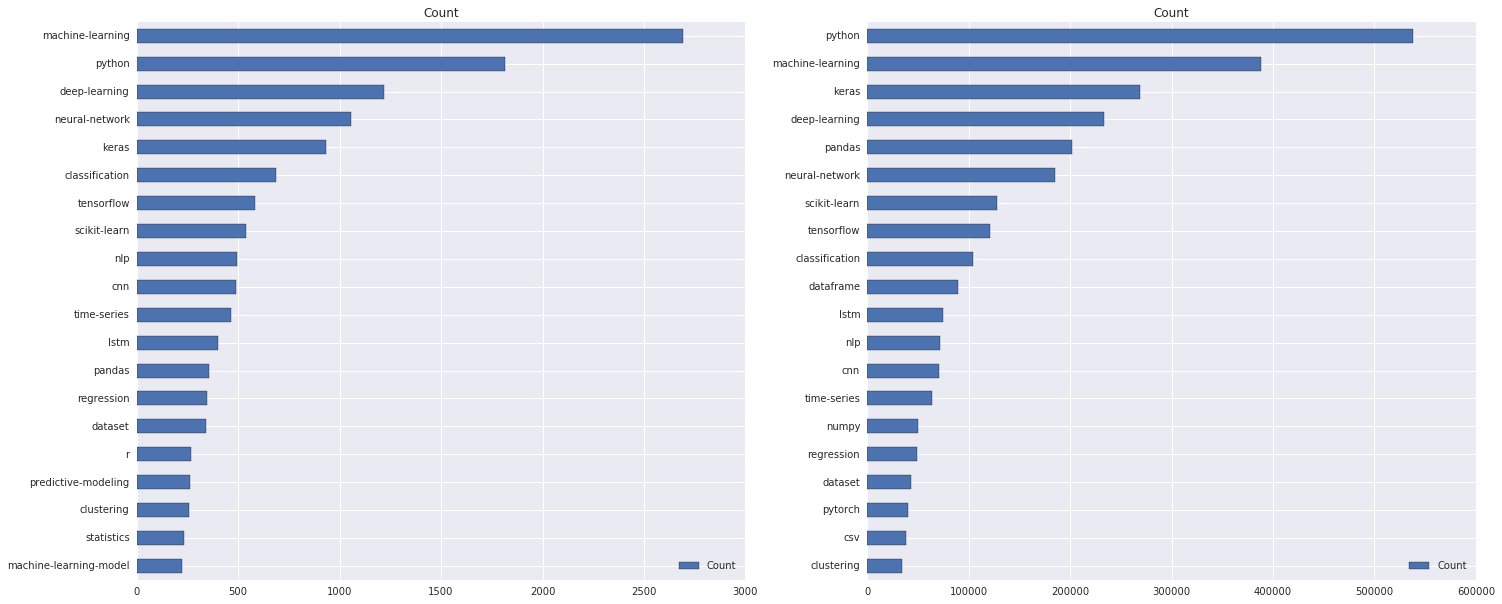

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))

most_used.plot(kind='barh', ax=axes[0], subplots=True)
most_viewed.plot(kind='barh', ax=axes[1], subplots=True)

In [13]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

# Relations Between Tags
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

In [14]:
all_tags = list(tag_count.index)
all_tags

['hinge-loss',
 'dimensionality-reduction',
 'gridsearchcv',
 'dummy-variables',
 'rmsle',
 'matrix',
 'machine-translation',
 'text-generation',
 'supervised-learning',
 'information-theory',
 'wikipedia',
 'activity-recognition',
 'churn',
 'ranking',
 'sagemaker',
 'convolution',
 'beginner',
 'labels',
 'programming',
 'scipy',
 'ndcg',
 'parallel',
 'social-network-analysis',
 'octave',
 'mongodb',
 'vector-space-models',
 'markov',
 'multi-instance-learning',
 'svr',
 'automation',
 'association-rules',
 'weighted-data',
 'csv',
 'inception',
 'ensemble-learning',
 'software-recommendation',
 'markov-hidden-model',
 'metric',
 'theano',
 'glm',
 'representation',
 'anaconda',
 'pip',
 'word2vec',
 'data-transfer',
 'dynamic-programming',
 'alex-net',
 'scraping',
 'similar-documents',
 'pac-learning',
 'deep-network',
 'convergence',
 'tools',
 'twitter',
 'image',
 'imbalanced-learn',
 'gensim',
 'variance',
 'hierarchical-data-format',
 'forecast',
 'cost-function',
 'google-pr

We will create a dataframe that where each row and column represent a tag.

In [15]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4, 0:4]

,hinge-loss,dimensionality-reduction,gridsearchcv,dummy-variables
hinge-loss,NaN,NaN,NaN,NaN
dimensionality-reduction,NaN,NaN,NaN,NaN
gridsearchcv,NaN,NaN,NaN,NaN
dummy-variables,NaN,NaN,NaN,NaN


The dataframe needs to be filled. It will be filled with zeros intially and then for each tag pair values will be added

In [16]:
associations.fillna(0, inplace=True)
for tags in questions['Tags']:
    associations.loc[tags, tags] += 1

The dataframe is too large. We will focus the relationship between the most used tags. 

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


We used yellow color to show that r and time-series is used together for 22 times. The cells in blue shows that how many times each tag was used. We can confirm the count with our data above. However, this is not very human readable and therefore we need to create a heatmap. Before we do it, we need to get rid of values in blues so that it does not skew our data.

In [18]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

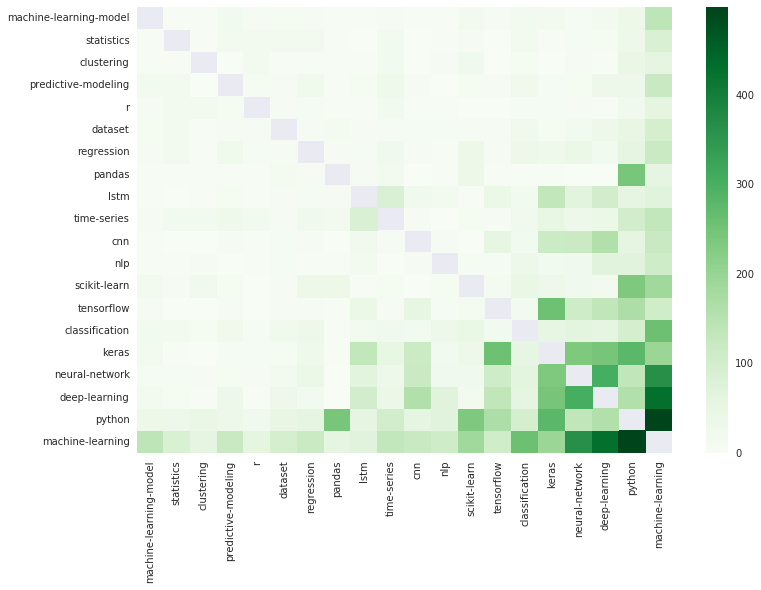

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap='Greens', annot=False)

The most used tags seems to have a stronger relationships. We can see that dark green boxes are where there is most used tags. This could however also mean that because they are the popular ones so they are being used together a lot without possibly having a strong connection between them


# Enter Domain Knowledge


Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

# Just a Fad?

In [20]:
all_q = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")
all_q.head(10)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

In [21]:
def check_tag(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_q['DeepLearning'] = all_q['Tags'].apply(check_tag)

In [22]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
8817,60238,2019-09-15 15:54:31,"[nlp, data-mining, text-mining]",0
18839,33255,2018-06-16 14:58:21,"[machine-learning, neural-network, machine-lea...",1
19376,55048,2019-07-04 12:31:12,"[python, keras, scikit-learn]",1
8155,18475,2017-04-20 07:45:21,"[text-mining, orange]",0
8073,58792,2019-09-06 13:22:46,"[scikit-learn, linear-regression, logistic-reg...",1


In [23]:
all_q['CreationDate'].dt.strftime('%Y%m').sort_values().unique()

array(['201405', '201406', '201407', '201408', '201409', '201410',
       '201411', '201412', '201501', '201502', '201503', '201504',
       '201505', '201506', '201507', '201508', '201509', '201510',
       '201511', '201512', '201601', '201602', '201603', '201604',
       '201605', '201606', '201607', '201608', '201609', '201610',
       '201611', '201612', '201701', '201702', '201703', '201704',
       '201705', '201706', '201707', '201708', '201709', '201710',
       '201711', '201712', '201801', '201802', '201803', '201804',
       '201805', '201806', '201807', '201808', '201809', '201810',
       '201811', '201812', '201901', '201902', '201903', '201904',
       '201905', '201906', '201907', '201908', '201909', '201910',
       '201911', '201912', '202001'], dtype=object)

We will track the data quarterly. Since we do not have the data for first quarter of 2020, we will drop 2020. 

In [24]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [25]:
def get_quarter(c_date):
    month = int(c_date.strftime('%m'))
    year = str(c_date.strftime('%y'))
    if month > 9:
        return year + 'Q4'
    elif month > 6:
        return year + 'Q3'
    elif month > 3:
        return year + 'Q2'
    else:
        return year + 'Q1'

all_q['Quarter'] = all_q['CreationDate'].apply(get_quarter)
all_q.tail(10)

,Id,CreationDate,Tags,DeepLearning,Quarter
21566,36958,2018-08-15 06:53:37,"[neural-network, time-series, lstm, recurrent-...",1,18Q3
21567,36964,2018-08-15 09:56:28,"[machine-learning, data-mining, text-mining]",0,18Q3
21568,36965,2018-08-15 10:05:54,"[cnn, rnn]",1,18Q3
21569,36968,2018-08-15 13:02:05,"[python, statistics, visualization, categorica...",0,18Q3
21570,36970,2018-08-15 13:40:54,"[machine-learning, keras, tensorflow, cnn]",1,18Q3
21571,36971,2018-08-15 14:19:01,"[statistics, data]",0,18Q3
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",1,18Q3
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",0,18Q3
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",1,18Q3
21575,36985,2018-08-15 17:01:29,"[python, deep-learning, tensorflow]",1,18Q3



For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [26]:
quarterly = all_q.groupby('Quarter').agg({'DeepLearning': ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly.head(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,9,157,0.057325
1,14Q3,13,189,0.068783
2,14Q4,21,216,0.097222
3,15Q1,18,190,0.094737
4,15Q2,28,284,0.098592


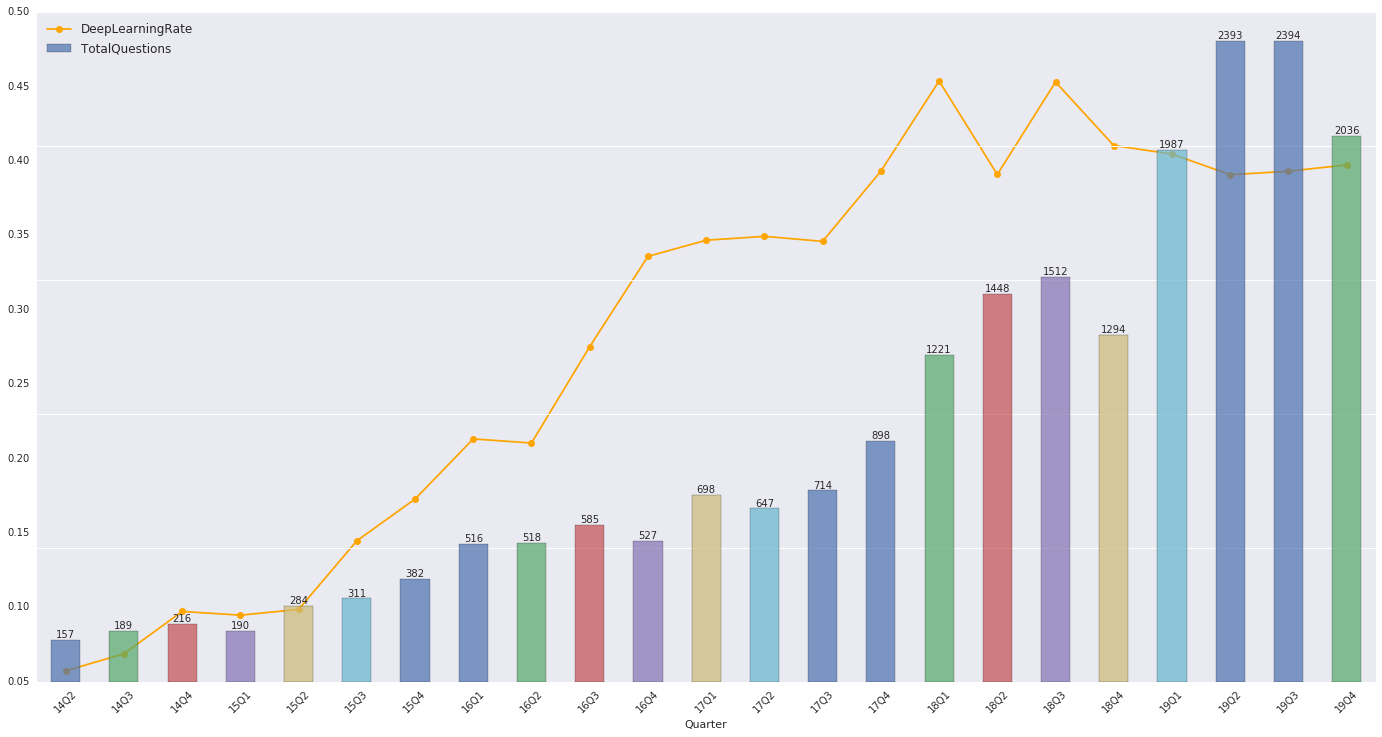

In [46]:
ax1 = quarterly.plot(x='Quarter', y='DeepLearningRate', kind='line'
                    ,linestyle='-', marker='o', color='orange',
                    figsize=(24,12))
ax2 = quarterly.plot(x='Quarter', y='TotalQuestions', kind='bar', ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)